In [1]:
from conditional_inference.quantile_unbiased.stats import cond_quant_unbiased
from conditional_inference.quantile_unbiased.rqu import RQU

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

In [2]:
n_policies = 3
step = 1
mean = step * np.arange(n_policies)
cov = np.identity(n_policies)

In [3]:
# compute conditionally unbiased quantiles of the best in-sample policy
est = RQU(mean, cov)
dist = est.get_distribution()
dist.ppf([.05, .25, .5, .75, .95])

array([-1.18733478,  0.68280941,  1.68627552,  2.53315113,  3.6037973 ])

<AxesSubplot:>

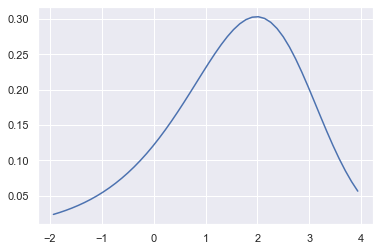

In [4]:
# plot a distribution based conditionally unbiased quantiles
arr = np.linspace(dist.ppf(.025), dist.ppf(.975))
sns.lineplot(x=arr, y=dist.pdf(arr))

<AxesSubplot:>

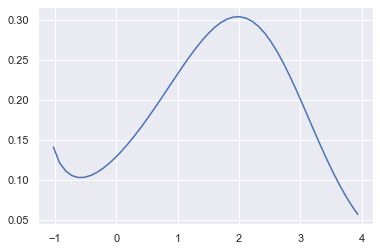

In [5]:
# plot a distribution based on the hybrid estimator
dist = RQU(mean, cov).get_distribution(beta=.005)
arr = np.linspace(dist.ppf(.025), dist.ppf(.975))
sns.lineplot(x=arr, y=dist.pdf(arr))

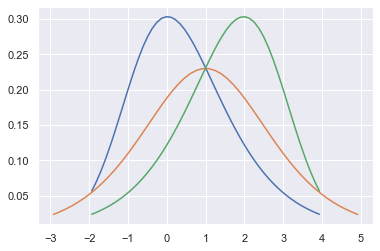

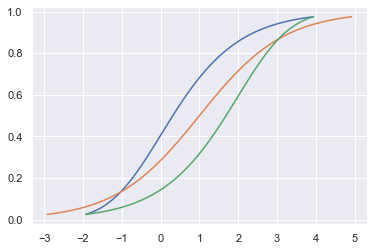

In [6]:
# make plots for each policy conditional on its observed rank
for dist in est.get_distributions():
    arr = np.linspace(dist.ppf(.025), dist.ppf(.975))
    sns.lineplot(x=arr, y=dist.pdf(arr))

plt.show()

for dist in est.get_distributions():
    arr = np.linspace(dist.ppf(.025), dist.ppf(.975))
    sns.lineplot(x=arr, y=dist.cdf(arr))

In [7]:
# create statsmodels-styled summary tables for conditionally quantile-unbiased estimates
conditional_results = est.fit()
conditional_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
     Quantile-unbiased estimates     
=====================================
   coef (median) pvalue [0.025 0.975]
-------------------------------------
x0         0.314  0.406 -1.933  3.933
x1         1.000  0.285 -2.922  4.922
x2         1.686  0.143 -1.933  3.933
===============
Dep. Variable y
---------------
"""

<AxesSubplot:title={'center':'Quantile-unbiased estimates'}, xlabel='y'>

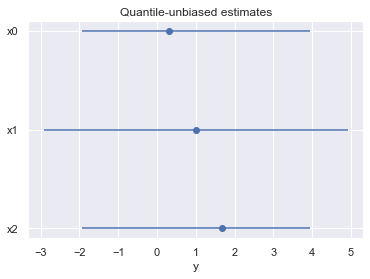

In [8]:
# create a point plot for conditionally quantile-unbiased estimates
conditional_results.point_plot()

In [9]:
# summary table for hybrid confidence intervals
hybrid_results = est.fit(beta=.005)
hybrid_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
     Quantile-unbiased estimates     
=====================================
   coef (median) pvalue [0.025 0.975]
-------------------------------------
x0         0.312  0.409 -1.977  3.042
x1         1.000  0.288 -2.042  4.042
x2         1.688  0.144 -1.042  3.977
===============
Dep. Variable y
---------------
"""

<AxesSubplot:title={'center':'Quantile-unbiased estimates'}, xlabel='y'>

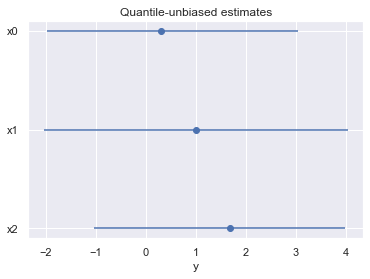

In [10]:
hybrid_results.point_plot()

In [11]:
# summary table for projection confidence intervals
projection_results = est.fit(projection=True)
projection_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Projection estimates                  
=========================================================
   coef (conventional) pvalue 0.95 CI lower 0.95 CI upper
---------------------------------------------------------
x0               0.000  0.876        -2.406         2.406
x1               1.000  0.406        -1.406         3.406
x2               2.000  0.067        -0.406         4.406
===============
Dep. Variable y
---------------
"""

<AxesSubplot:title={'center':'Projection estimates'}, xlabel='y'>

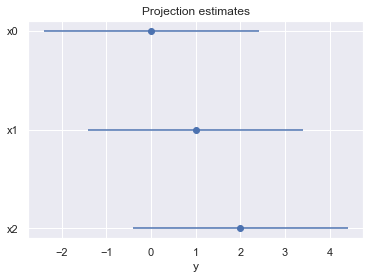

In [12]:
projection_results.point_plot()

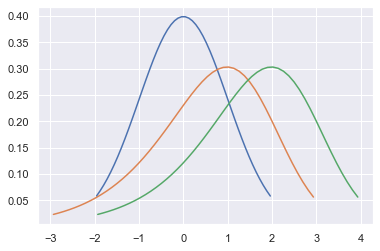

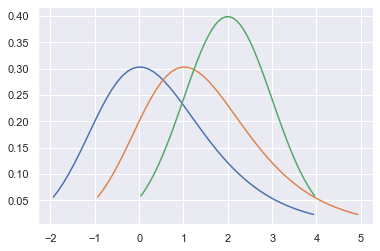

In [13]:
# set the rank order conditions flexibly
# "floor" conditions on the k-th best policy in sample being ranked at least k-th best in sample
# e.g., the conditioning that the second-best policy in sample is ranked at least second
for dist in est.get_distributions(rank="floor"):
    arr = np.linspace(dist.ppf(.025), dist.ppf(.975))
    sns.lineplot(x=arr, y=dist.pdf(arr))

plt.show()

# "ceil" is the opposite; conditioning on the k-th best policy in sample being ranked at best k-th best in sample
for dist in est.get_distributions(rank="ceil"):
    arr = np.linspace(dist.ppf(.025), dist.ppf(.975))
    sns.lineplot(x=arr, y=dist.pdf(arr))

<AxesSubplot:>

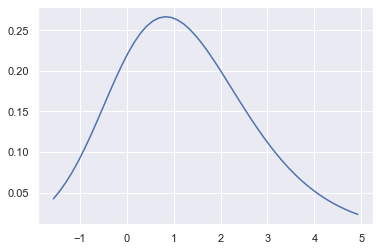

In [14]:
# you can also create quantile unbiased estimators using arbitrary truncation sets for other conditioning events
dist = cond_quant_unbiased(y=1, scale=1, truncation_set=[(-1, -.5), (0, 2)])
arr = np.linspace(dist.ppf(.025), dist.ppf(.975))
sns.lineplot(x=arr, y=dist.pdf(arr))